In [4]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 13.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 KB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# ============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS - FITNESS DATASET
# Python - Análisis Completo
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [7]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. CARGA Y EXPLORACIÓN INICIAL
# ============================================================================

# Cargar datos
df = pd.read_csv('data/Final_data.csv')

print("=" * 70)
print("ESTRUCTURA DEL DATASET")
print("=" * 70)
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nTipos de datos:")
print(df.dtypes.value_counts())

print(f"\n{'=' * 70}")
print("VALORES FALTANTES")
print("=" * 70)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No hay valores faltantes en el dataset")
else:
    print(missing[missing > 0])

print(f"\n{'=' * 70}")
print("PRIMERAS 5 FILAS")
print("=" * 70)
print(df.head())



ESTRUCTURA DEL DATASET
Dimensiones: 20000 filas x 54 columnas

Tipos de datos:
float64    39
object     15
Name: count, dtype: int64

VALORES FALTANTES
✓ No hay valores faltantes en el dataset

PRIMERAS 5 FILAS
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4 

In [8]:
# ============================================================================
# 2. ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print(f"\n{'=' * 70}")
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE")
print("=" * 70)

key_vars = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Calories_Burned', 
            'Session_Duration (hours)', 'Calories', 'Fat_Percentage',
            'Workout_Frequency (days/week)', 'protein_per_kg']

print(df[key_vars].describe().round(2))




ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE
            Age  Weight (kg)  Height (m)       BMI  Calories_Burned  \
count  20000.00     20000.00    20000.00  20000.00         20000.00   
mean      38.85        73.90        1.72     24.92          1280.11   
std       12.11        21.17        0.13      6.70           502.23   
min       18.00        39.18        1.49     12.04           323.11   
25%       28.17        58.16        1.62     20.10           910.80   
50%       39.86        70.00        1.71     24.12          1231.45   
75%       49.63        86.10        1.80     28.56          1553.11   
max       59.67       130.77        2.01     50.23          2890.82   

       Session_Duration (hours)  Calories  Fat_Percentage  \
count                  20000.00  20000.00        20000.00   
mean                       1.26   2024.42           26.10   
std                        0.34    541.89            5.00   
min                        0.49    781.00           11.33   


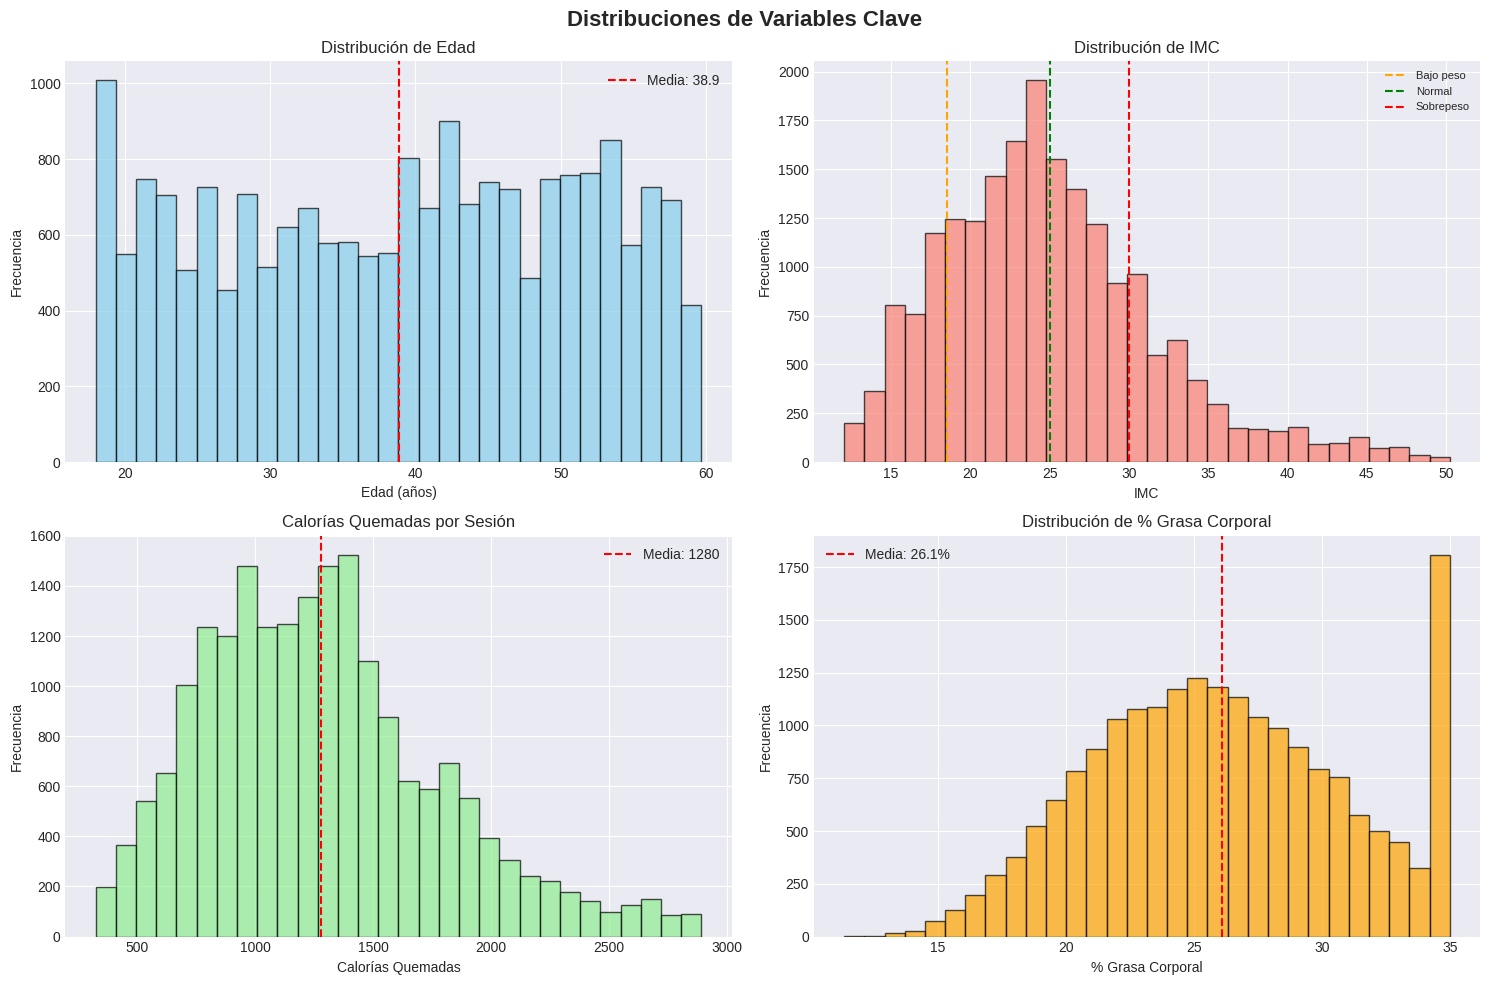

In [9]:
# ============================================================================
# 3. DISTRIBUCIONES DE VARIABLES CLAVE
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuciones de Variables Clave', fontsize=16, fontweight='bold')

# Edad
axes[0, 0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Edad (años)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Edad')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Media: {df["Age"].mean():.1f}')
axes[0, 0].legend()

# IMC
axes[0, 1].hist(df['BMI'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('IMC')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de IMC')
axes[0, 1].axvline(18.5, color='orange', linestyle='--', label='Bajo peso')
axes[0, 1].axvline(25, color='green', linestyle='--', label='Normal')
axes[0, 1].axvline(30, color='red', linestyle='--', label='Sobrepeso')
axes[0, 1].legend(fontsize=8)

# Calorías Quemadas
axes[1, 0].hist(df['Calories_Burned'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Calorías Quemadas')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Calorías Quemadas por Sesión')
axes[1, 0].axvline(df['Calories_Burned'].mean(), color='red', linestyle='--', 
                   label=f'Media: {df["Calories_Burned"].mean():.0f}')
axes[1, 0].legend()

# Porcentaje de Grasa
axes[1, 1].hist(df['Fat_Percentage'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('% Grasa Corporal')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de % Grasa Corporal')
axes[1, 1].axvline(df['Fat_Percentage'].mean(), color='red', linestyle='--', 
                   label=f'Media: {df["Fat_Percentage"].mean():.1f}%')
axes[1, 1].legend()

plt.tight_layout()
plt.show()




DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS

Gender:
Gender
Female    10028
Male       9972
Name: count, dtype: int64
Porcentajes:
Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64

Workout_Type:
Workout_Type
Strength    5071
Yoga        5032
HIIT        4974
Cardio      4923
Name: count, dtype: int64
Porcentajes:
Workout_Type
Strength    25.4
Yoga        25.2
HIIT        24.9
Cardio      24.6
Name: proportion, dtype: float64

diet_type:
diet_type
Paleo         3403
Low-Carb      3379
Vegetarian    3337
Keto          3324
Vegan         3323
Balanced      3234
Name: count, dtype: int64
Porcentajes:
diet_type
Paleo         17.0
Low-Carb      16.9
Vegetarian    16.7
Keto          16.6
Vegan         16.6
Balanced      16.2
Name: proportion, dtype: float64

Difficulty Level:
Difficulty Level
Intermediate    6696
Advanced        6657
Beginner        6647
Name: count, dtype: int64
Porcentajes:
Difficulty Level
Intermediate    33.5
Advanced        33.3
Beginner        33.2
Name:

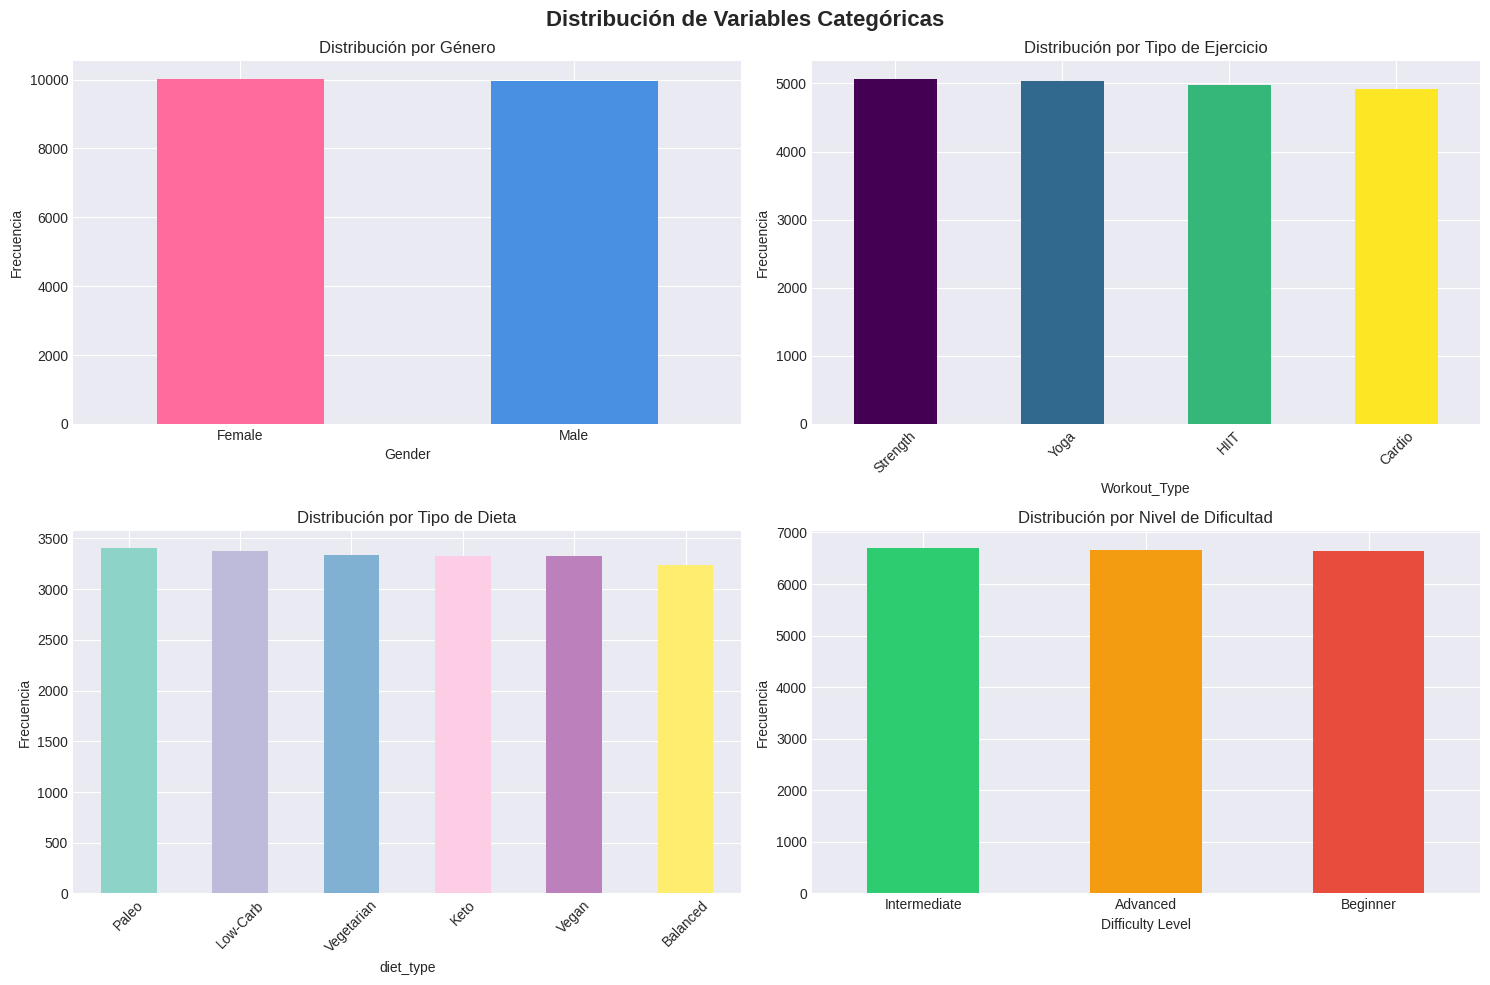

In [11]:
# ============================================================================
# 4. ANÁLISIS DE VARIABLES CATEGÓRICAS
# ============================================================================
import matplotlib.cm as cm

print(f"\n{'=' * 70}")
print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 70)

cat_vars = ['Gender', 'Workout_Type', 'diet_type', 'Difficulty Level']

for var in cat_vars:
    print(f"\n{var}:")
    print(df[var].value_counts())
    print(f"Porcentajes:")
    print((df[var].value_counts(normalize=True) * 100).round(1))

# Visualización de categóricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

# Género
df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#ff6b9d', '#4a90e2'])
axes[0, 0].set_title('Distribución por Género')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].tick_params(axis='x', rotation=0)

# Tipo de Ejercicio - CORRECCIÓN AQUÍ
workout_counts = df['Workout_Type'].value_counts()
colors_workout = cm.viridis(np.linspace(0, 1, len(workout_counts)))
workout_counts.plot(kind='bar', ax=axes[0, 1], color=colors_workout)
axes[0, 1].set_title('Distribución por Tipo de Ejercicio')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].tick_params(axis='x', rotation=45)

# Tipo de Dieta - CORRECCIÓN AQUÍ
diet_counts = df['diet_type'].value_counts()
colors_diet = cm.Set3(np.linspace(0, 1, len(diet_counts)))
diet_counts.plot(kind='bar', ax=axes[1, 0], color=colors_diet)
axes[1, 0].set_title('Distribución por Tipo de Dieta')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45)

# Nivel de Dificultad
df['Difficulty Level'].value_counts().plot(kind='bar', ax=axes[1, 1], 
                                            color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[1, 1].set_title('Distribución por Nivel de Dificultad')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

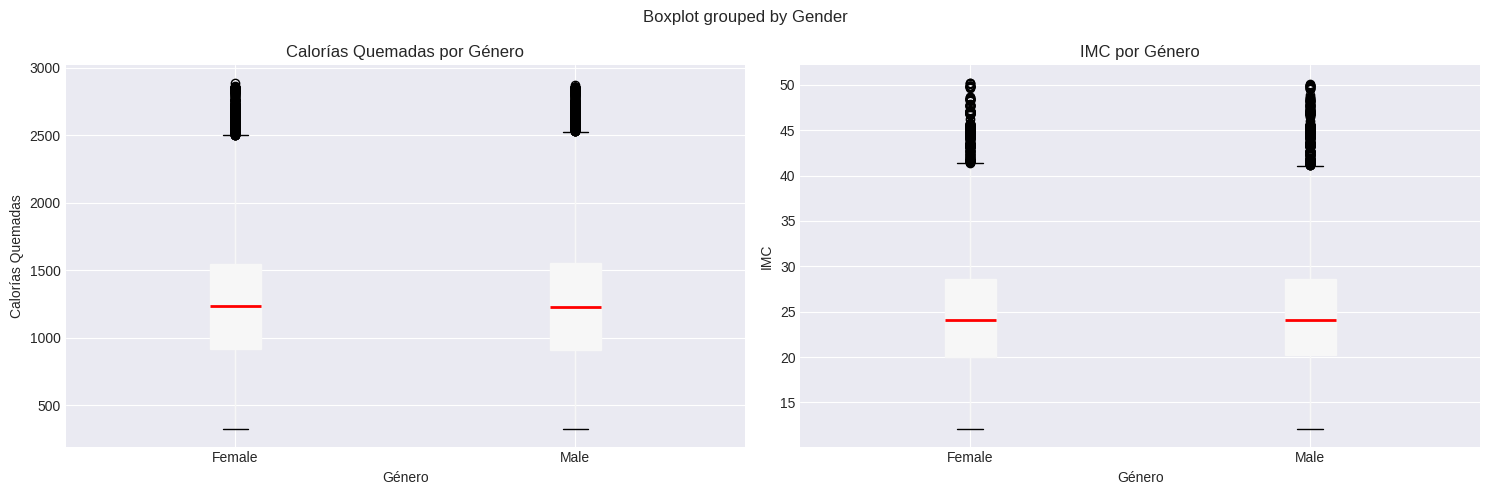

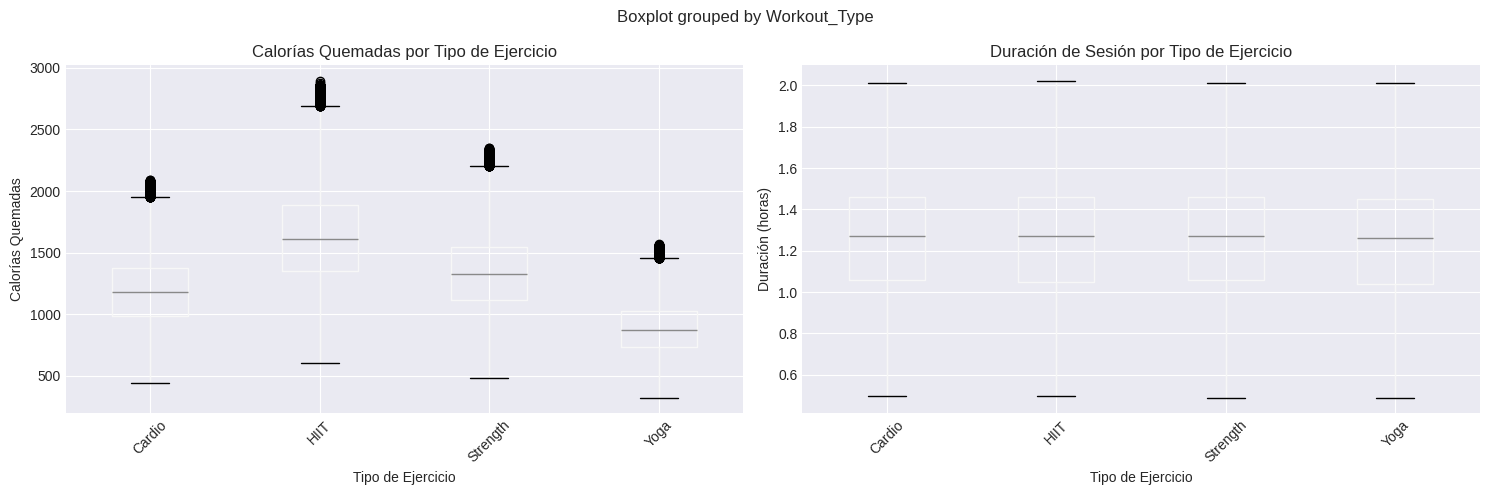


MATRIZ DE CORRELACIÓN


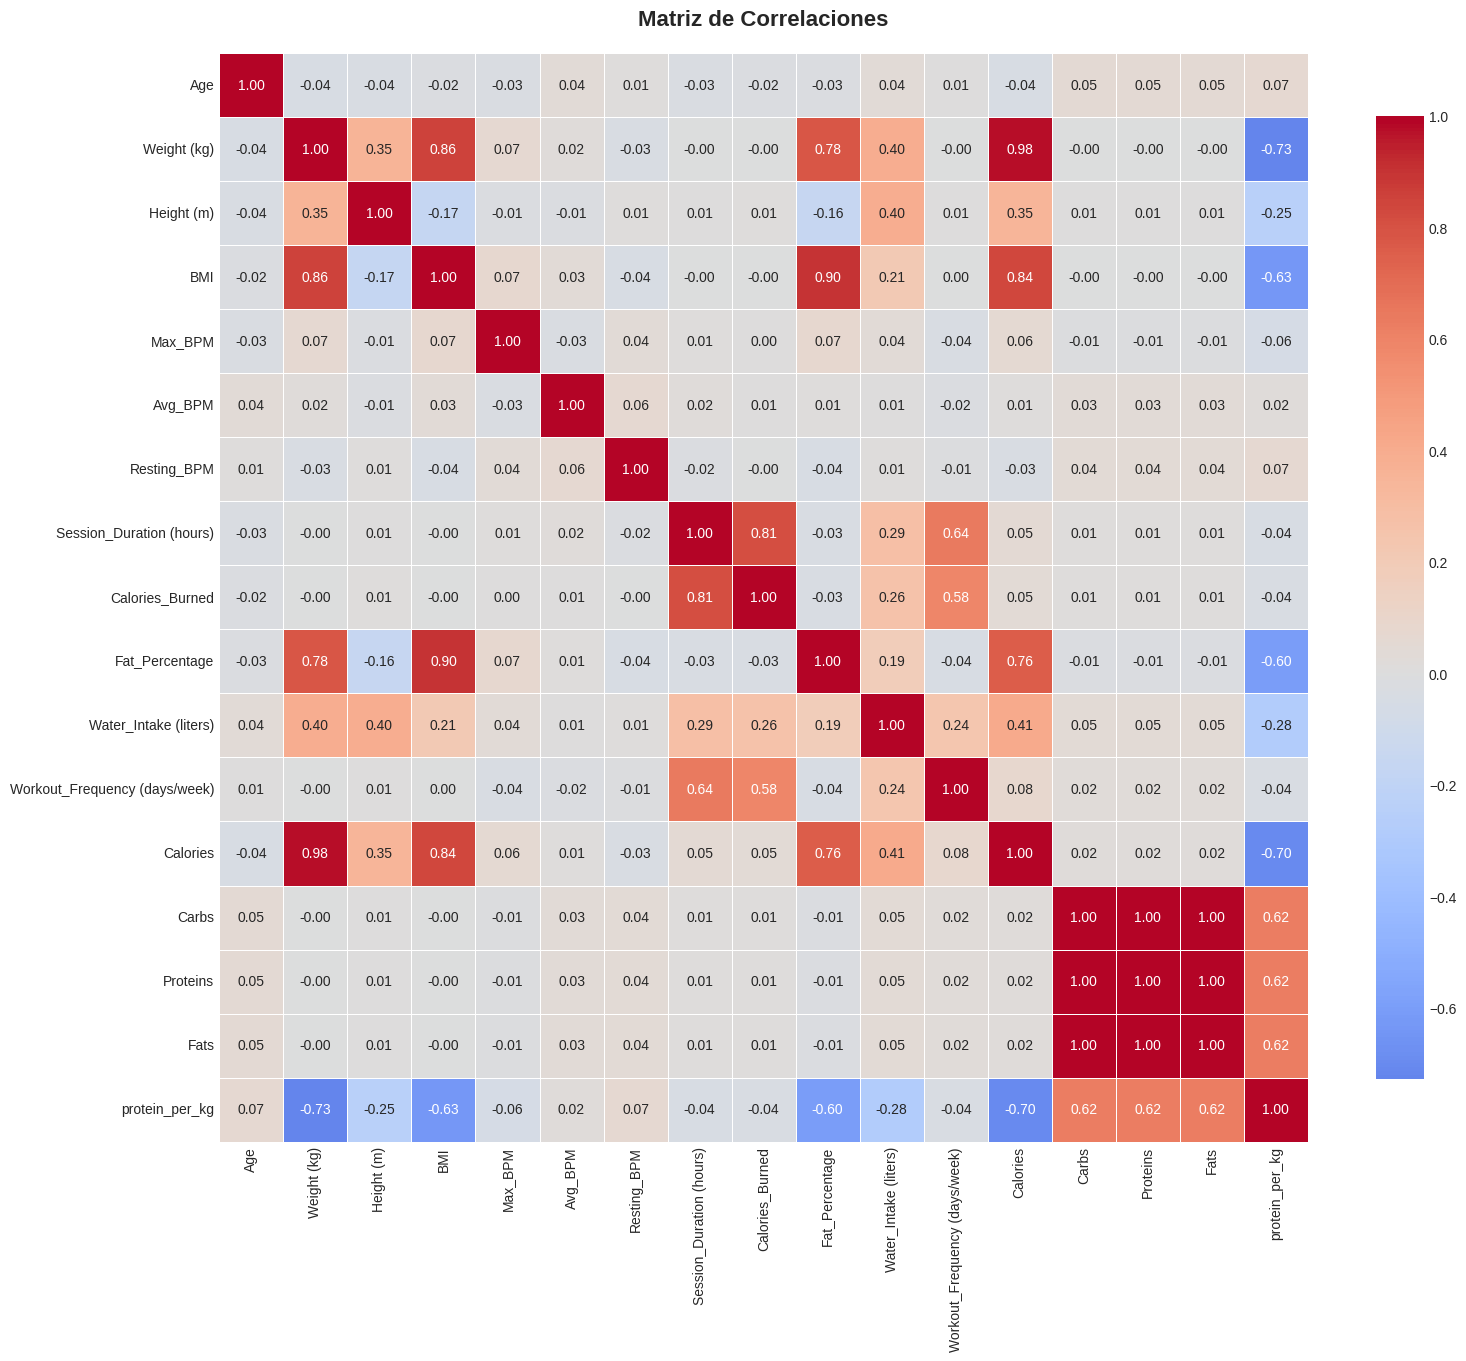


TOP 10 CORRELACIONES CON CALORÍAS QUEMADAS:
Calories_Burned                  1.000000
Session_Duration (hours)         0.814368
Workout_Frequency (days/week)    0.582787
Water_Intake (liters)            0.262731
Calories                         0.047981
Carbs                            0.011929
Fats                             0.011769
Proteins                         0.011602
Height (m)                       0.009211
Avg_BPM                          0.007984
Name: Calories_Burned, dtype: float64


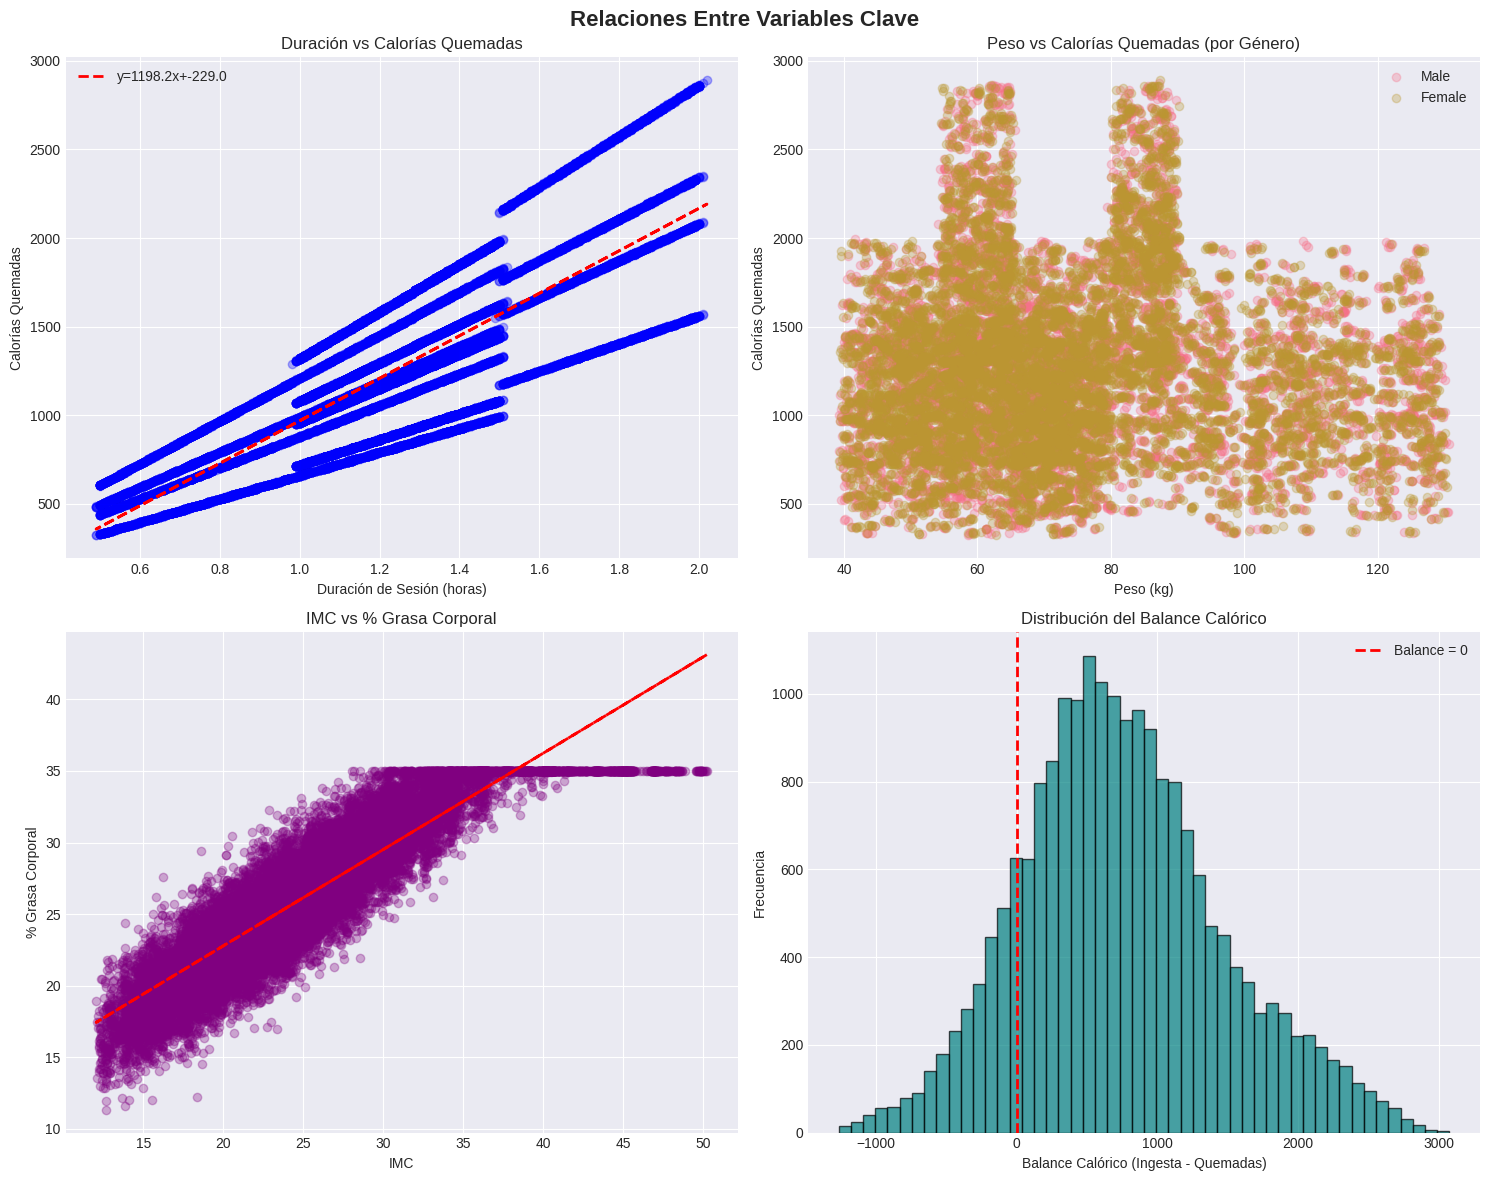


DETECCIÓN DE OUTLIERS (Método IQR)
Age: 0 outliers (0.00%)
Weight (kg): 152 outliers (0.76%)
Height (m): 0 outliers (0.00%)
BMI: 530 outliers (2.65%)
Calories_Burned: 507 outliers (2.54%)
Session_Duration (hours): 0 outliers (0.00%)
Calories: 102 outliers (0.51%)
Fat_Percentage: 1 outliers (0.01%)
Workout_Frequency (days/week): 0 outliers (0.00%)
protein_per_kg: 327 outliers (1.64%)

ESTADÍSTICAS POR NIVEL DE EXPERIENCIA
             Calories_Burned         Session_Duration (hours)  \
                        mean     std                     mean   
Exp_Category                                                    
Principiante          950.01  341.35                     1.02   
Intermedio           1274.38  309.63                     1.25   
Avanzado             1947.29  435.63                     1.76   

             Workout_Frequency (days/week)    BMI  
                                      mean   mean  
Exp_Category                                       
Principiante               

In [12]:
# ============================================================================
# 5. ANÁLISIS BIVARIADO - GÉNERO
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Análisis por Género', fontsize=16, fontweight='bold')

# Calorías quemadas por género
df.boxplot(column='Calories_Burned', by='Gender', ax=axes[0], 
           patch_artist=True, medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Calorías Quemadas por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Calorías Quemadas')
plt.sca(axes[0])
plt.xticks([1, 2], ['Female', 'Male'])

# IMC por género
df.boxplot(column='BMI', by='Gender', ax=axes[1],
           patch_artist=True, medianprops=dict(color='red', linewidth=2))
axes[1].set_title('IMC por Género')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('IMC')
plt.sca(axes[1])
plt.xticks([1, 2], ['Female', 'Male'])

plt.tight_layout()
plt.show()

# ============================================================================
# 6. ANÁLISIS POR TIPO DE EJERCICIO
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Análisis por Tipo de Ejercicio', fontsize=16, fontweight='bold')

# Calorías por tipo de workout
df.boxplot(column='Calories_Burned', by='Workout_Type', ax=axes[0])
axes[0].set_title('Calorías Quemadas por Tipo de Ejercicio')
axes[0].set_xlabel('Tipo de Ejercicio')
axes[0].set_ylabel('Calorías Quemadas')
axes[0].tick_params(axis='x', rotation=45)

# Duración por tipo de workout
df.boxplot(column='Session_Duration (hours)', by='Workout_Type', ax=axes[1])
axes[1].set_title('Duración de Sesión por Tipo de Ejercicio')
axes[1].set_xlabel('Tipo de Ejercicio')
axes[1].set_ylabel('Duración (horas)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. MATRIZ DE CORRELACIÓN
# ============================================================================

print(f"\n{'=' * 70}")
print("MATRIZ DE CORRELACIÓN")
print("=" * 70)

# Seleccionar variables numéricas relevantes
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Max_BPM', 'Avg_BPM', 
                'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                'Fat_Percentage', 'Water_Intake (liters)', 
                'Workout_Frequency (days/week)', 'Calories', 'Carbs', 
                'Proteins', 'Fats', 'protein_per_kg']

corr_matrix = df[numeric_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaciones', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlaciones con Calories_Burned
print("\nTOP 10 CORRELACIONES CON CALORÍAS QUEMADAS:")
correlations = corr_matrix['Calories_Burned'].sort_values(ascending=False)
print(correlations.head(10))

# ============================================================================
# 8. RELACIONES IMPORTANTES (SCATTER PLOTS)
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relaciones Entre Variables Clave', fontsize=16, fontweight='bold')

# Duración vs Calorías
axes[0, 0].scatter(df['Session_Duration (hours)'], df['Calories_Burned'], 
                   alpha=0.3, c='blue')
axes[0, 0].set_xlabel('Duración de Sesión (horas)')
axes[0, 0].set_ylabel('Calorías Quemadas')
axes[0, 0].set_title('Duración vs Calorías Quemadas')
# Línea de regresión
z = np.polyfit(df['Session_Duration (hours)'], df['Calories_Burned'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Session_Duration (hours)'], p(df['Session_Duration (hours)']), 
                "r--", linewidth=2, label=f'y={z[0]:.1f}x+{z[1]:.1f}')
axes[0, 0].legend()

# Peso vs Calorías por género
for gender in df['Gender'].unique():
    mask = df['Gender'] == gender
    axes[0, 1].scatter(df[mask]['Weight (kg)'], df[mask]['Calories_Burned'],
                      alpha=0.3, label=gender)
axes[0, 1].set_xlabel('Peso (kg)')
axes[0, 1].set_ylabel('Calorías Quemadas')
axes[0, 1].set_title('Peso vs Calorías Quemadas (por Género)')
axes[0, 1].legend()

# IMC vs % Grasa
axes[1, 0].scatter(df['BMI'], df['Fat_Percentage'], alpha=0.3, c='purple')
axes[1, 0].set_xlabel('IMC')
axes[1, 0].set_ylabel('% Grasa Corporal')
axes[1, 0].set_title('IMC vs % Grasa Corporal')
z = np.polyfit(df['BMI'], df['Fat_Percentage'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['BMI'], p(df['BMI']), "r--", linewidth=2)

# Balance Calórico
axes[1, 1].hist(df['cal_balance'], bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Balance = 0')
axes[1, 1].set_xlabel('Balance Calórico (Ingesta - Quemadas)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución del Balance Calórico')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 9. DETECCIÓN DE OUTLIERS
# ============================================================================

print(f"\n{'=' * 70}")
print("DETECCIÓN DE OUTLIERS (Método IQR)")
print("=" * 70)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

for col in key_vars:
    n_outliers = detect_outliers_iqr(df, col)
    pct_outliers = (n_outliers / len(df)) * 100
    print(f"{col}: {n_outliers} outliers ({pct_outliers:.2f}%)")

# ============================================================================
# 10. ANÁLISIS POR NIVEL DE EXPERIENCIA
# ============================================================================

print(f"\n{'=' * 70}")
print("ESTADÍSTICAS POR NIVEL DE EXPERIENCIA")
print("=" * 70)

# Crear categorías de experiencia
df['Exp_Category'] = pd.cut(df['Experience_Level'], 
                             bins=[0, 1.5, 2.5, 3],
                             labels=['Principiante', 'Intermedio', 'Avanzado'])

exp_stats = df.groupby('Exp_Category').agg({
    'Calories_Burned': ['mean', 'std'],
    'Session_Duration (hours)': 'mean',
    'Workout_Frequency (days/week)': 'mean',
    'BMI': 'mean'
}).round(2)

print(exp_stats)

print(f"\n{'=' * 70}")
print("ANÁLISIS EXPLORATORIO COMPLETADO")
print("=" * 70)
print("\nPróximos pasos sugeridos:")
print("1. Regresión Lineal Simple y Múltiple")
print("2. Regularización (Ridge y Lasso)")
print("3. Árboles de Regresión y ajuste de hiperparámetros")
print("4. Comparación Random Forest vs Gradient Boosting")